In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("mushroom_full.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data.habitat.unique()

array(['WOODS', 'MEADOWS', 'GRASSES', 'PATHS', 'URBAN', 'LEAVES', 'WASTE'],
      dtype=object)

In [11]:
data["class"].unique()

array(['EDIBLE', 'POISONOUS'], dtype=object)

In [15]:
#features = data.iloc[:,1]


#label = data.iloc[:,0]

In [16]:
#80:20 split
from sklearn.model_selection import train_test_split

train ,test = train_test_split(data, test_size=0.2, random_state=0)

In [17]:
train.shape

(6732, 23)

In [18]:
test.shape

(1684, 23)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
for col in data.columns.values:
    W_data=data[col].append(test[col])
    le.fit(W_data.values)
    data[col]=le.transform(data[col])
    test[col]=le.transform(test[col])

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,8,0,0,1,1,1,10,...,3,7,7,0,2,1,4,6,4,6
1,0,2,3,8,0,0,1,1,1,10,...,3,7,7,0,2,1,4,1,4,6
2,0,2,3,8,0,0,1,1,1,7,...,3,7,7,0,2,1,4,6,4,6
3,0,2,3,8,0,0,1,1,1,7,...,3,7,7,0,2,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,...,3,7,7,0,2,1,4,6,4,6


In [30]:
X_train=data.iloc[:,1:]
y_train=data.iloc[:,0]

In [31]:
X_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

In [32]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,8,0,0,1,1,1,10,1,...,3,7,7,0,2,1,4,6,4,6
1,2,3,8,0,0,1,1,1,10,1,...,3,7,7,0,2,1,4,1,4,6
2,2,3,8,0,0,1,1,1,7,1,...,3,7,7,0,2,1,4,6,4,6
3,2,3,8,0,0,1,1,1,7,1,...,3,7,7,0,2,1,4,1,4,6
4,2,3,8,0,0,1,1,1,1,1,...,3,7,7,0,2,1,4,6,4,6


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
DTClassifier= DecisionTreeClassifier(max_depth=22, min_samples_split =3,criterion='gini',min_samples_leaf=3)
DTClassifier.fit(X_train,y_train)
predicted_labels = DTClassifier.predict(X_test)
DTClassifier.score(X_test, y_test)

1.0

In [37]:
predicted_labels=DTClassifier.predict(X_test)

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)

In [36]:
gnb.score(X_test, y_test)

0.8539192399049881

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       898
           1       1.00      1.00      1.00       786

   micro avg       1.00      1.00      1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
#creating a function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

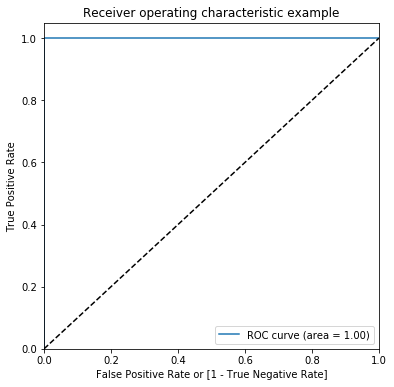

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))

In [44]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
draw_roc(y_test,predicted_labels)

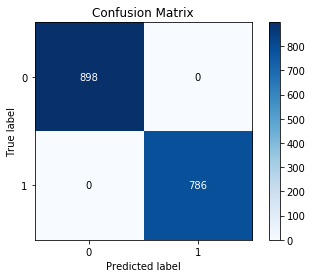

In [45]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predicted_labels, normalize=False)
plt.show()